In [5]:
from tensorflow import keras
from keras import utils
from keras import Model
from keras import layers

from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt
from keras.applications import ResNet50V2
#from astroNN.datasets import load_galaxy10sdss
from astroNN.datasets.galaxy10sdss import galaxy10cls_lookup, galaxy10_confusion

import h5py
import numpy as np

# To get the images and labels from file
with h5py.File('Galaxy10.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Dense, Activation, BatchNormalization, Add  
from tensorflow.keras import backend as K

#images, labels = load_galaxy10sdss()

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)


# Split the dataset into training set and testing set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]


In [6]:
pre_trained_model = ResNet50V2(input_shape = (69, 69, 3), include_top = False, weights = 'imagenet')


x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)
model = Model(pre_trained_model.input, x)

model.compile(
loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5


I0000 00:00:1714919072.701977    2279 service.cc:145] XLA service 0x7f22b8002880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714919072.702008    2279 service.cc:153]   StreamExecutor device (0): NVIDIA A10, Compute Capability 8.6
2024-05-05 22:24:33.202544: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-05 22:24:37.401201: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


  7/613 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.2503 - loss: 3.6109 

I0000 00:00:1714919093.266427    2279 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


613/613 ━━━━━━━━━━━━━━━━━━━━ 72s 57ms/step - accuracy: 0.5031 - loss: 1.4387 - val_accuracy: 0.7187 - val_loss: 0.7868
Epoch 2/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7193 - loss: 0.8025 - val_accuracy: 0.7219 - val_loss: 0.7535
Epoch 3/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7680 - loss: 0.6750 - val_accuracy: 0.7288 - val_loss: 0.8114
Epoch 4/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7882 - loss: 0.6372 - val_accuracy: 0.6443 - val_loss: 0.9769
Epoch 5/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7759 - loss: 0.6533 - val_accuracy: 0.7237 - val_loss: 0.7654


In [ ]:
'''
# 假设输入图像的形状为 (height, width, channels)  
input_shape = (69, 69, 3)  # 替换为实际的图像高度、宽度和通道数  
  
# 定义输入层  
inputs = Input(shape=input_shape)  
  
# 第一个卷积层  
x = Conv2D(64, (6, 6), strides=(1, 1), padding='same')(inputs)  
x = BatchNormalization()(x)  
x = Activation('relu')(x)  
  
# 第一个最大池化层  
x = MaxPooling2D((2, 2), strides=(2, 2))(x)  
  
# 定义残差单元的函数（假设每个残差单元包含两个卷积层）  
def residual_unit(inputs, filters,dropout_rate):  
    # 第一个卷积层  
    x = Conv2D(filters, (1, 1), padding='same')(inputs)  
    x = BatchNormalization()(x)  
    x = Activation('relu')(x)  
      
    # 第二个卷积层  
    x = Conv2D(filters, (3, 3), padding='same')(x)  
    x = BatchNormalization()(x)  
    x = Activation('relu')(x)  
    
 
    x = Dropout(dropout_rate)(x) 
        
    x = Conv2D(4*filters, (1, 1), padding='same')(x)  
    x = BatchNormalization()(x)      
    # 残差连接  
    input_shape = K.int_shape(inputs)  
    residual_shape = K.int_shape(x)  
    
    if input_shape[-1] != residual_shape[-1]:  
    # 如果不匹配，使用1x1卷积来调整通道数  
        identity = Conv2D(residual_shape[-1], (1, 1), padding='same', use_bias=False)(inputs)  
        identity = BatchNormalization()(identity)  
    else:  
    # 如果匹配，则直接使用输入作为identity  
        identity = inputs
        
    x = Add()([identity, x]) 
    x = BatchNormalization()(x)  
    x = Activation('relu')(x)  
    return x  
  
N=2
  
for _ in range(N):  
    x = residual_unit(x, 64,0.8)  # 假设每个卷积组的输出通道数与输入通道数相同  
  
for _ in range(N):  
    x = residual_unit(x, 128,0.8)  # 假设每个卷积组的输出通道数与输入通道数相同  

for _ in range(N):  
    x = residual_unit(x, 256,0.8)  # 假设每个卷积组的输出通道数与输入通道数相同  
    
for _ in range(N):  
    x = residual_unit(x, 512,0.8)  # 假设每个卷积组的输出通道数与输入通道数相同  
  
# 最后一个平均池化层，假设在前面的卷积层后，x 的通道数为 4096  
x = AveragePooling2D((4, 4))(x)  
  
# 假设经过平均池化后，特征图的尺寸为 1x1，直接展平  
x = Flatten()(x)  
  
# 全连接层  
x = Dense(4096, activation='relu')(x)  
# 假设这里没有额外的 Dropout 层或其他层  
  
# 输出层  
outputs = Dense(10, activation='softmax')(x)  
  
# 创建模型  
model = Model(inputs=inputs, outputs=outputs)  
  
# 打印模型摘要  
model.summary()
'''

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step


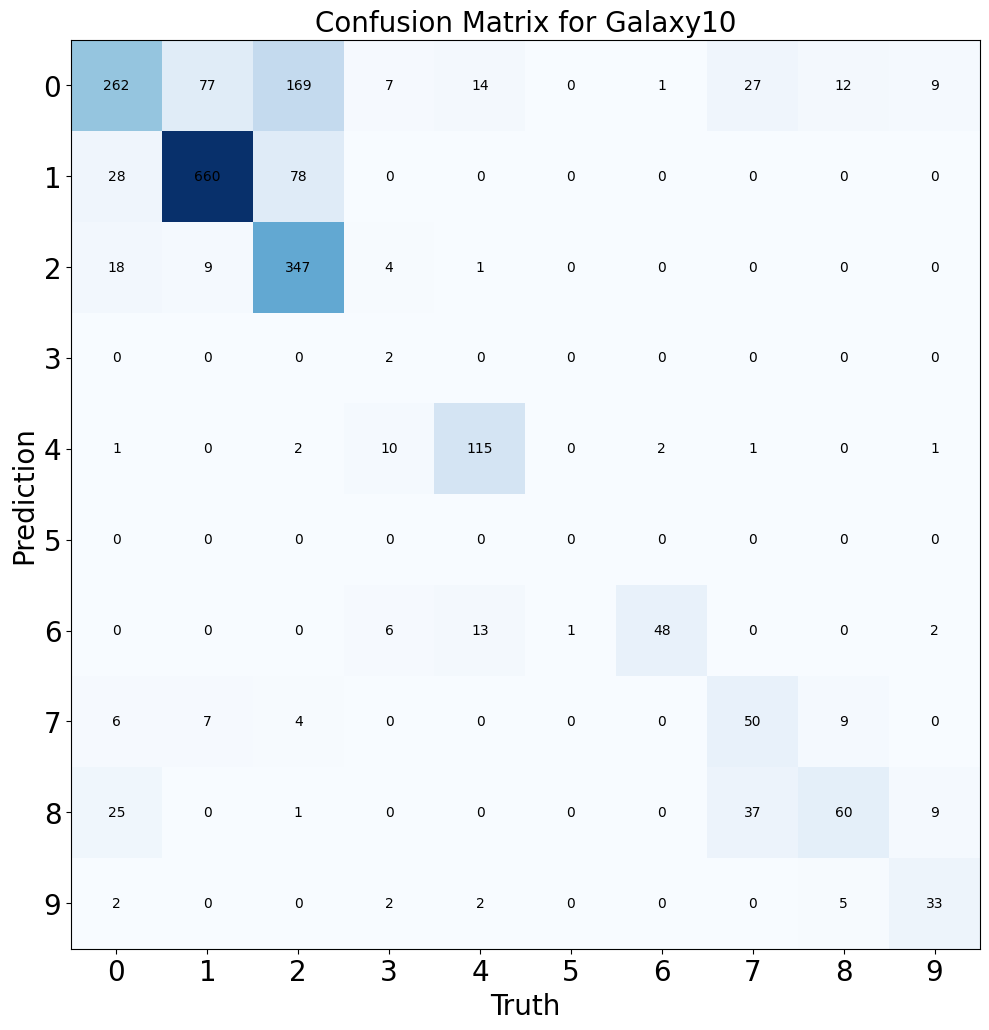

In [7]:

predicted_labels = model.predict(test_images)
predicted_class = np.argmax(predicted_labels, axis=1)
test_class = np.argmax(test_labels, axis=1)
confusion_matrix = np.zeros((10,10))
for counter, i in enumerate(predicted_class):
    confusion_matrix[i, test_class[counter]] += 1
galaxy10_confusion(confusion_matrix)
